# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
!pip install citipy
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

     ---------------------------------------- 0.0/675.6 kB ? eta -:--:--
     ---- ---------------------------------- 71.7/675.6 kB 3.8 MB/s eta 0:00:01
     -------------------- ----------------- 368.6/675.6 kB 5.7 MB/s eta 0:00:01
     -------------------------------------- 675.6/675.6 kB 6.1 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for citipy: filename=citipy-0.0.6-py3-none-any.whl size=675977 sha256=82857929bc219523fc56f562259b3e5e91c3a8e6c11e1f3e3945ec1c80d158a9
  Stored in directory: c:\users\ashby\appdata\local\pip\cache\wheels\4b\b5\88\49107ff846ec6967b34c17d369176c591fc90ed93b706755ad
Successfully built citipy


### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 580


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [14]:
# Set the API base URL
url = 'https://api.openweathermap.org/data/2.5/weather?'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&units=metric&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather =requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | yellowknife
Processing Record 2 of Set 1 | sault ste. marie
Processing Record 3 of Set 1 | bethel
Processing Record 4 of Set 1 | nova sintra
Processing Record 5 of Set 1 | mount gambier
Processing Record 6 of Set 1 | cornwall
Processing Record 7 of Set 1 | sirjan
Processing Record 8 of Set 1 | kingston
Processing Record 9 of Set 1 | ushuaia
Processing Record 10 of Set 1 | port-aux-francais
Processing Record 11 of Set 1 | port alfred
Processing Record 12 of Set 1 | taiohae
City not found. Skipping...
Processing Record 13 of Set 1 | hithadhoo
Processing Record 14 of Set 1 | saudarkrokur
Processing Record 15 of Set 1 | fortuna
Processing Record 16 of Set 1 | zavety il'icha
Processing Record 17 of Set 1 | bel ombre
Processing Record 18 of Set 1 | dabakala
Processing Record 19 of Set 1 | mutsu
Processing Record 20 of Set 1 | kirensk
Processing Record 21 of Set 1 | petropavlovsk-kamchatsky
Processing R

City not found. Skipping...
Processing Record 42 of Set 4 | ta`u
Processing Record 43 of Set 4 | ash shatrah
Processing Record 44 of Set 4 | dunedin
Processing Record 45 of Set 4 | daru
Processing Record 46 of Set 4 | vilyuchinsk
Processing Record 47 of Set 4 | qaqortoq
Processing Record 48 of Set 4 | firuzabad
Processing Record 49 of Set 4 | ust-nera
Processing Record 0 of Set 5 | zambezi
Processing Record 1 of Set 5 | lambarene
Processing Record 2 of Set 5 | gebeit
Processing Record 3 of Set 5 | bolkhov
Processing Record 4 of Set 5 | hotan
Processing Record 5 of Set 5 | tsiombe
Processing Record 6 of Set 5 | margate
Processing Record 7 of Set 5 | ardestan
Processing Record 8 of Set 5 | rutland
Processing Record 9 of Set 5 | san salvador de jujuy
Processing Record 10 of Set 5 | st. john's
Processing Record 11 of Set 5 | lata
Processing Record 12 of Set 5 | kristiansund
Processing Record 13 of Set 5 | kenai
Processing Record 14 of Set 5 | mangrol
Processing Record 15 of Set 5 | minas d

Processing Record 34 of Set 8 | cozumel
Processing Record 35 of Set 8 | bardai
Processing Record 36 of Set 8 | chiili
City not found. Skipping...
Processing Record 37 of Set 8 | marathon
Processing Record 38 of Set 8 | maiurno
Processing Record 39 of Set 8 | poronaysk
Processing Record 40 of Set 8 | el granada
Processing Record 41 of Set 8 | muisne
Processing Record 42 of Set 8 | dawson creek
Processing Record 43 of Set 8 | rosso
Processing Record 44 of Set 8 | pontianak
Processing Record 45 of Set 8 | sechura
Processing Record 46 of Set 8 | cardigan
Processing Record 47 of Set 8 | utrik
Processing Record 48 of Set 8 | kununurra
Processing Record 49 of Set 8 | floriano
Processing Record 0 of Set 9 | savelugu
Processing Record 1 of Set 9 | kharp
Processing Record 2 of Set 9 | poso
Processing Record 3 of Set 9 | los altos
Processing Record 4 of Set 9 | strathalbyn
Processing Record 5 of Set 9 | zelenokumsk
Processing Record 6 of Set 9 | el paso
Processing Record 7 of Set 9 | fort st. joh

Processing Record 24 of Set 12 | valentin gomez farias
Processing Record 25 of Set 12 | mount darwin
Processing Record 26 of Set 12 | yerofey pavlovich
Processing Record 27 of Set 12 | san jose village
City not found. Skipping...
Processing Record 28 of Set 12 | cedeira
Processing Record 29 of Set 12 | dryden
-----------------------------
Data Retrieval Complete      
-----------------------------


In [15]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          561
Lat           561
Lng           561
Max Temp      561
Humidity      561
Cloudiness    561
Wind Speed    561
Country       561
Date          561
dtype: int64

In [16]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,yellowknife,62.4560,-114.3525,1.34,100,75,2.06,CA,1697554375
1,sault ste. marie,46.5168,-84.3333,6.16,89,0,2.06,CA,1697554806
2,bethel,41.3712,-73.4140,15.11,73,40,2.06,US,1697554298
3,nova sintra,14.8667,-24.7167,25.53,69,1,5.66,CV,1697554420
4,mount gambier,-37.8333,140.7667,5.78,92,0,2.07,AU,1697554166


In [19]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [20]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

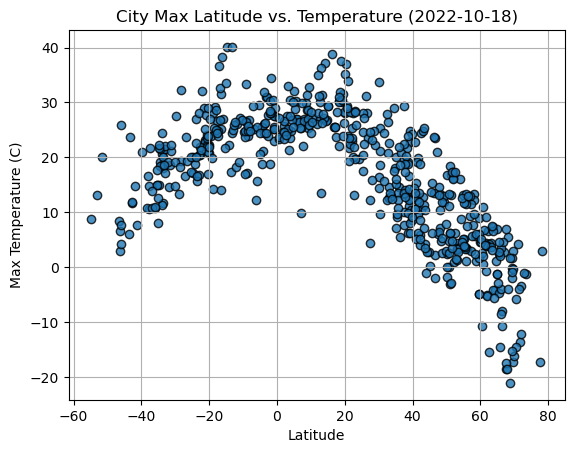

In [8]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

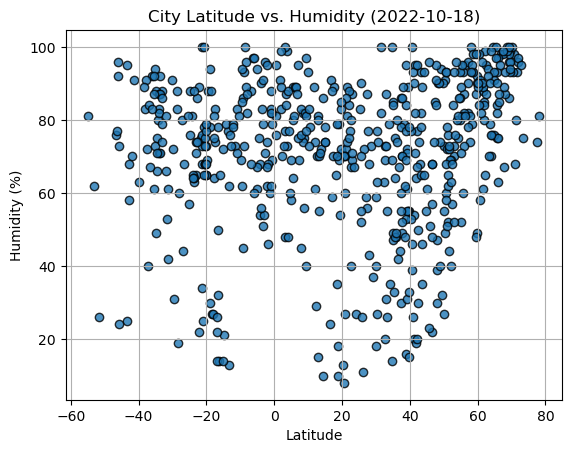

In [9]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

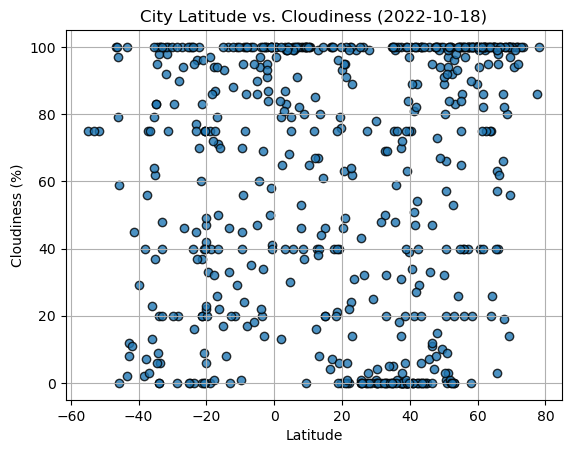

In [10]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

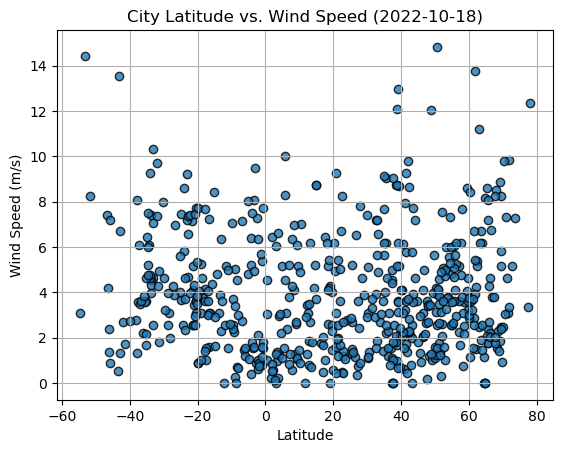

In [11]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [31]:
# Define a function to create Linear Regression plots
from scipy.stats import pearsonr
import scipy.stats as st


def linear_reg(x_axis, y_axis,eq_loc):  
    correlation = st.pearsonr(x_axis,y_axis)
    p_slope, p_int, p_r, p_p, p_std_err = st.linregress(x_axis, y_axis)
    p_fit = p_slope * x_axis + p_int
    eq= f"y ={p_slope: .2f}x +{ p_int: .2f}"
       
    #Plot the line
    plt.scatter(x_axis, y_axis ,marker="o")
    plt.plot(x_axis,p_fit,"--", color='red')
    plt.annotate(eq, eq_loc, fontsize=12, color='red')
    print(f"The r-value between {x_axis.name} and {y_axis.name} is {round(correlation[0],2)}")

In [32]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat']>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230
6,albany,42.6001,-73.9662,10.36,74,29,2.10,US,1666108231


In [33]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat']<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
5,ushuaia,-54.8000,-68.3000,8.81,81,75,3.09,AR,1666108231
7,carnarvon,-24.8667,113.6333,20.02,76,0,7.46,AU,1666108232
9,saint-pierre,-21.3393,55.4781,22.82,68,0,5.14,RE,1666108236
10,colorado,-22.8375,-51.9731,20.36,86,96,4.69,BR,1666107965


###  Temperature vs. Latitude Linear Regression Plot

The r-value between Lat and Max Temp is -0.85


Text(0, 0.5, 'Temperature(C)')

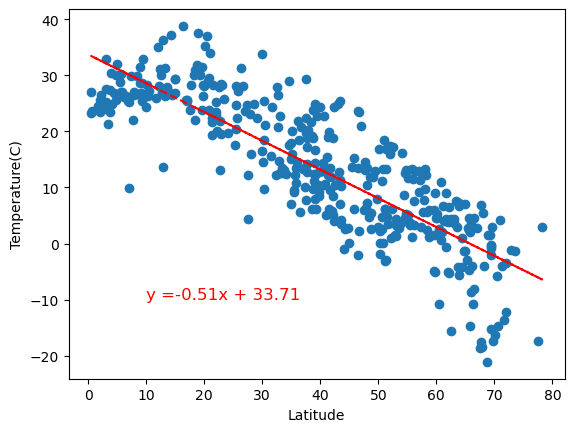

In [34]:
# Linear regression on Northern Hemisphere
linear_reg(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'],(10, -10))
plt.xlabel('Latitude')
plt.ylabel('Temperature(C)')

The r-value between Lat and Max Temp is 0.64


Text(0, 0.5, 'Temperature(C)')

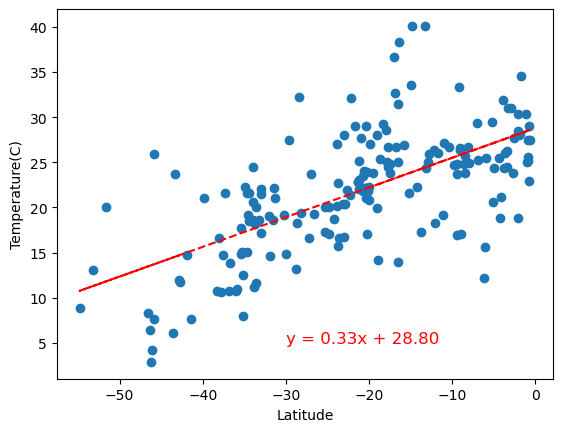

In [35]:
# Linear regression on Southern Hemisphere
linear_reg(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'],(-30, 5))
plt.xlabel('Latitude')
plt.ylabel('Temperature(C)')

**Discussion about the linear relationship:** The negative r value of -0.85 indicates there's a negative coorelation between latitiude and temperature. Since -.85 is relatively close to -1, this implies a strong negative relationship.

In laymans terms this means the further north you move move, generally, the colder the temperature gets. 

The southern hemisphere has an R value of .64. This is a weaker coorelation but it still exists. 0.64 implies a positive linear relationship.

This indicates the closer you get to the equator, the warmer it gets. 

This regression reflects a common sense geographic phenomenon: temps are generally warmer at the equator and cooler at the poles. The difference in strength of coorelation might be attributed to things such as landmass vs surface water in each respective hempsphere, altitude, and ocean currents. 

### Humidity vs. Latitude Linear Regression Plot

The r-value between Lat and Humidity is 0.24


Text(0, 0.5, 'Humidity(%)')

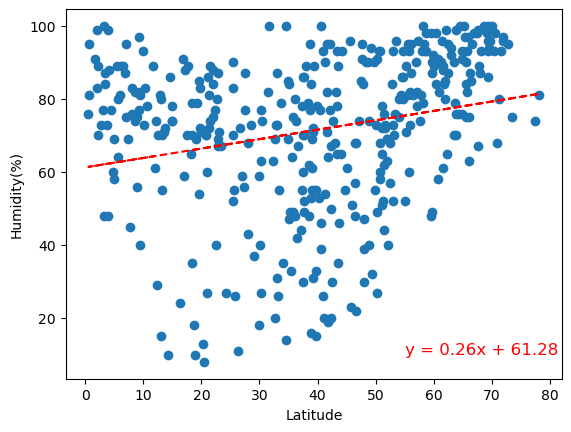

In [36]:
# Northern Hemisphere
linear_reg(northern_hemi_df['Lat'], northern_hemi_df['Humidity'],(55, 10))
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')

The r-value between Lat and Humidity is 0.02


Text(0, 0.5, 'Humidity(%)')

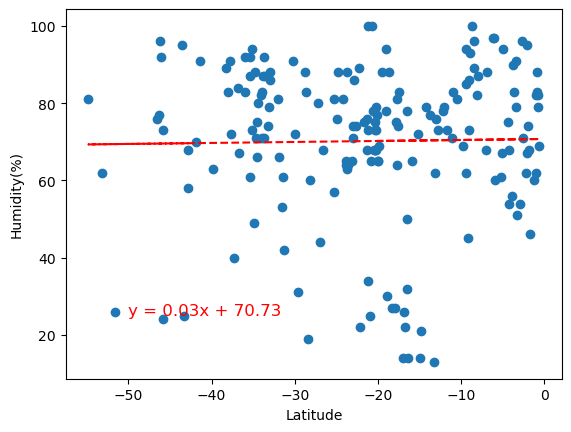

In [37]:
# Southern Hemisphere
linear_reg(southern_hemi_df['Lat'], southern_hemi_df['Humidity'],(-50, 25))
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value between Lat and Cloudiness is 0.16


Text(0, 0.5, 'Cloudiness(%)')

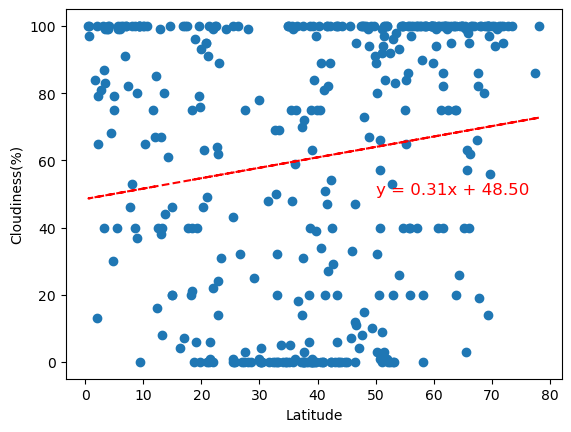

In [38]:
# Northern Hemisphere
linear_reg(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'],(50, 50))
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')

The r-value is: 0.02056735429994368


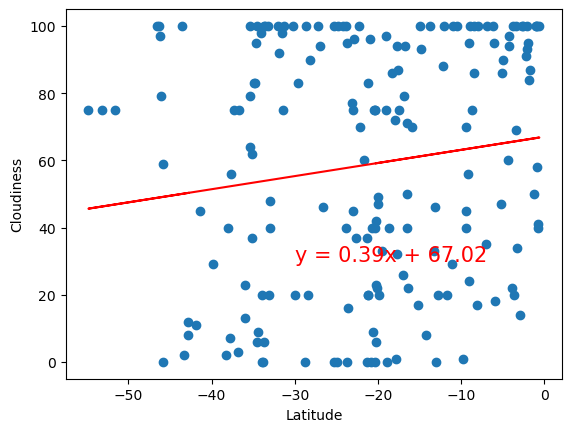

In [20]:
# Southern Hemisphere
linear_reg(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'],(-50, 65))
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')

**Discussion about the linear relationship:** In both hemispheres latitude as a postive relationship with humidity, though the strength varies. In the northern hemisphere there's a slight coorelation between latitidue increasing and humidity increasing, though the relationship is weak. The southern hemisphere has an even weaker relationship. This indicates that while in the northern hemisphere there's a slight relationship between latitude and humidity. In the southern hemisphere that relationship is almost noexistant. 
This to me indicates that latitidue and humidity aren't really connected. Other factors such as winds, proximity to the ocean/large bodies of freshwater, etc probably have stronger cuasation on humidity. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value between Lat and Wind Speed is 0.17


Text(0, 0.5, 'Wind Speed(m/s)')

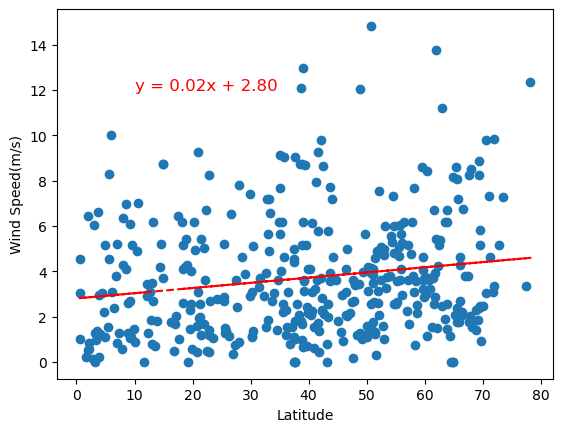

In [39]:
# Northern Hemisphere
linear_reg(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'],(10, 12))
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(m/s)')

The r-value between Lat and Wind Speed is -0.25


Text(0, 0.5, 'Wind Speed(m/s)')

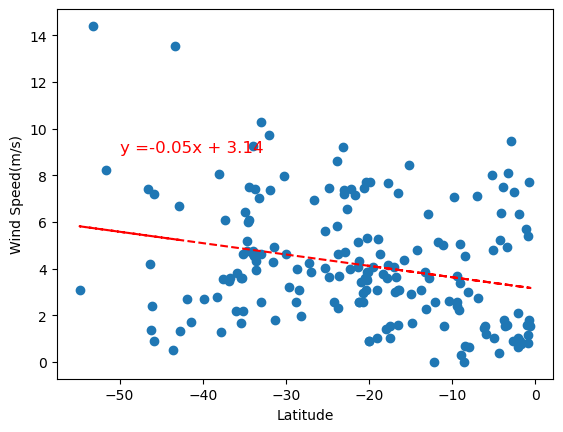

In [40]:
# Southern Hemisphere
linear_reg(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'],(-50, 9))
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(m/s)')

**Discussion about the linear relationship:** Similar to the last regresion, there's not really a strong connection since both r values are relatively close to 0. That said, the northern hemisphere has a slight positive relationship. This suggests higher latitdues might experience higher windspeed. 
Comparitively, the southern hemisphere has a slightly inverse relationship indicating wind speeds decrease near the equator. The align with one another. 
It's important to remeber these relationships are weak, meaning wind speed is probably impacted more by other outside factors (topography, proximity to bodies of water/oceans, atmospheric pressure and systems. 